In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import sigmoid as models
import constants

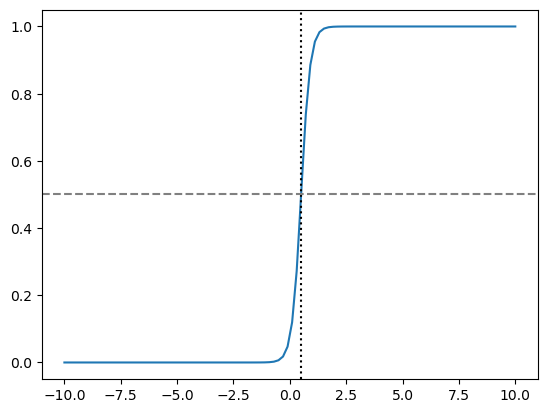

In [62]:
def sigmoid(x, b, c):
    return 1 / (1 + np.exp((b-x) / c))

import numpy as np
x = np.linspace(-10, 10, 100) 

# inflection point at x = b, y = 0.5
b = 0.5
plt.plot(x, sigmoid(x, b, 0.2))
plt.axvline(b, color='black', linestyle=':')
plt.axhline(0.5, color='gray', linestyle='--')
plt.show()


/var/folders/jp/0vb4wj0d5n98r8nbl1vhmw2c0000gp/T/ipykernel_59424/3162827551.py:20: RuntimeWarning: divide by zero encountered in divide
  mDKSS = (d / (1 + np.pow(b/np.log10(x),c))) # simplified for a = 0.0


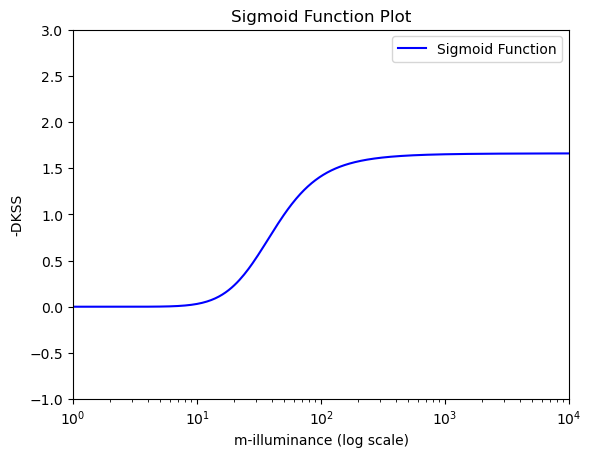

array([0.00000000e+00, 1.52345766e-06, 6.83864037e-05, ...,
       1.65905045e+00, 1.65905054e+00, 1.65905062e+00], shape=(10000,))

In [64]:
# New Sigmoid Test

# Cajochen 2020
# Note: says KSS but scale is not KSS...
# a = -24.4
# b = 94.8
# c = 3.7
# d = -8.11

# Hommes and Gimenez 2015
a = 0.0
b = 1.62
c = 8.26
d = 1.66

x = np.linspace(1, 10000, 10000)

# mDKSS = ((a - d) / (1 + np.pow(np.log10(x)/b,c))) + d

mDKSS = (d / (1 + np.pow(b/np.log10(x),c))) # simplified for a = 0.0

plt.plot(x, mDKSS, label='Sigmoid Function', color='blue')
plt.xscale('log')
plt.xlim(1, 10000)
plt.ylim(-1.0, 3.0)
plt.title('Sigmoid Function Plot')
plt.xlabel('m-illuminance (log scale)')
plt.ylabel('-DKSS')
plt.legend()
plt.show()

mDKSS

/var/folders/jp/0vb4wj0d5n98r8nbl1vhmw2c0000gp/T/ipykernel_59424/2261008698.py:2: RuntimeWarning: invalid value encountered in power
  return (d / (1 + np.power(b / np.log10(x), c)))
/var/folders/jp/0vb4wj0d5n98r8nbl1vhmw2c0000gp/T/ipykernel_59424/2261008698.py:2: RuntimeWarning: divide by zero encountered in divide
  return (d / (1 + np.power(b / np.log10(x), c)))


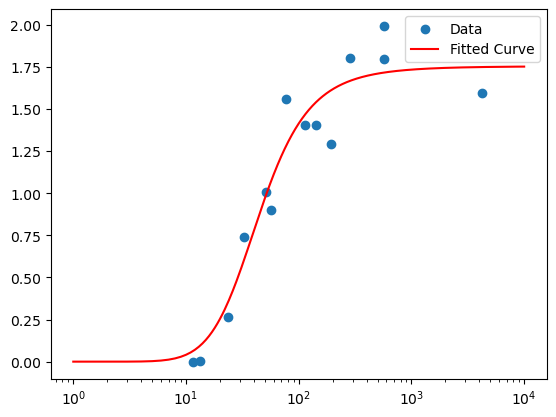

Best-fit parameters: [1.6519038  7.45030455 1.75356666]


In [70]:
def sigmoid(x, b, c, d):
    return (d / (1 + np.power(b / np.log10(x), c)))

from scipy.optimize import curve_fit
import pandas as pd
import numpy as np

df = pd.read_csv('data/hommes-gimenez-2015-m-illuminance-kss.csv')

# Replace 'm_illuminance' and 'kss' with your actual column names
x_data = df['m_illuminance'].values
y_data = df['delta_kss'].values

# x_data and y_data should be numpy arrays
popt, pcov = curve_fit(sigmoid, x_data, y_data, p0=[1, 1, 1])  # p0: initial guesses

x = np.linspace(1, 10000, 10000)

# popt contains the best-fit parameters
plt.scatter(x_data, y_data, label='Data')
plt.plot(x, sigmoid(x, *popt), color='red', label='Fitted Curve')
plt.xscale('log')
plt.legend()
plt.show()

print("Best-fit parameters:", popt)

/var/folders/jp/0vb4wj0d5n98r8nbl1vhmw2c0000gp/T/ipykernel_12191/3640093525.py:2: RuntimeWarning: invalid value encountered in power
  return (d / (1 + np.power(b / x, c))) # removed log10


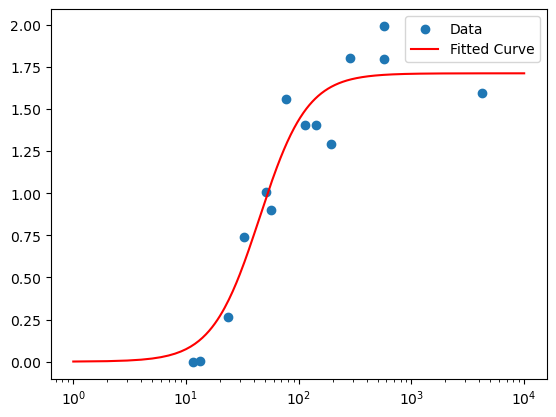

Best-fit parameters: [44.99706212  2.05873251  1.71132813]


In [7]:
def sigmoid(x, b, c, d):
    return (d / (1 + np.power(b / x, c))) # removed log10

from scipy.optimize import curve_fit
import pandas as pd
import numpy as np

df = pd.read_csv('data/hommes-gimenez-2015-m-illuminance-kss.csv')

# Replace 'm_illuminance' and 'kss' with your actual column names
x_data = df['m_illuminance'].values
y_data = df['delta_kss'].values

# x_data and y_data should be numpy arrays
popt, pcov = curve_fit(sigmoid, x_data, y_data, p0=[1, 1, 1])  # p0: initial guesses

x = np.linspace(1, 10000, 10000)

# popt contains the best-fit parameters
plt.scatter(x_data, y_data, label='Data')
plt.plot(x, sigmoid(x, *popt), color='red', label='Fitted Curve')
plt.xscale('log')
plt.legend()
plt.show()

print("Best-fit parameters:", popt)

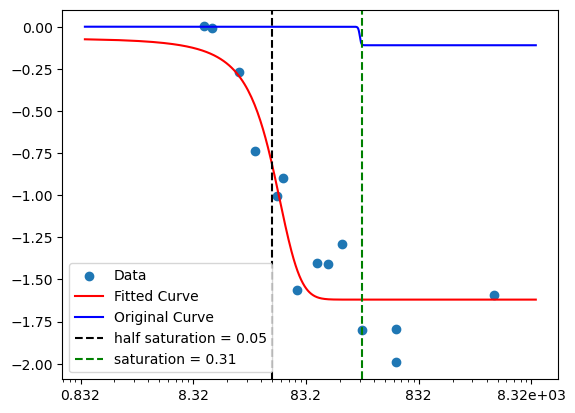

Best-fit parameters: [ 0.04970756  0.01604672 -1.619739  ]
Original parameters: 0.05 0.0044742729306487695 -0.11


In [ ]:
def sigmoid(x, b, c, d):
    return d / (1 + np.exp((b-x) / c))
    # return (d / (1 + np.power(b / x, c))) 

from scipy.optimize import curve_fit
import pandas as pd
import numpy as np

df = pd.read_csv('data/hommes-gimenez-2015-m-illuminance-kss.csv')

# Replace 'm_illuminance' and 'kss' with your actual column names
x_data = df['m_illuminance'].values * 0.91 * 1.2013e-3
y_data = -df['delta_kss'].values

# x_data and y_data should be numpy arrays
popt, pcov = curve_fit(sigmoid, x_data, y_data, p0=[1, 1, 1])  # p0: initial guesses

x = np.linspace(1, 10000, 10000) * 0.91 * 1.2013e-3

# popt contains the best-fit parameters
plt.scatter(x_data, y_data, label='Data')
plt.plot(x, sigmoid(x, *popt), color='red', label='Fitted Curve')
plt.plot(x, sigmoid(x, 0.3, constants.S_C, constants.NU_LA), color='blue', label='Original Curve')
plt.axvline(popt[0], color='black', linestyle='--', label=f'half saturation = {popt[0]:.2f}')
saturation = popt[0] - popt[1] * np.log((1-0.95)/0.95)
# saturation = constants.S_B - constants.S_C * np.log((1-0.95)/0.95)
plt.axvline(saturation, color='green', linestyle='--', label=f'saturation = {saturation:.2f}')

import matplotlib.ticker as mticker
def to_mel(x, pos):
    return f"{x / 1.2013e-3:.3g}"

plt.xscale('log')
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(to_mel))
plt.legend()
plt.show()

print("Best-fit parameters:", popt)
print("Original parameters:", constants.S_B, constants.S_C, constants.NU_LA)

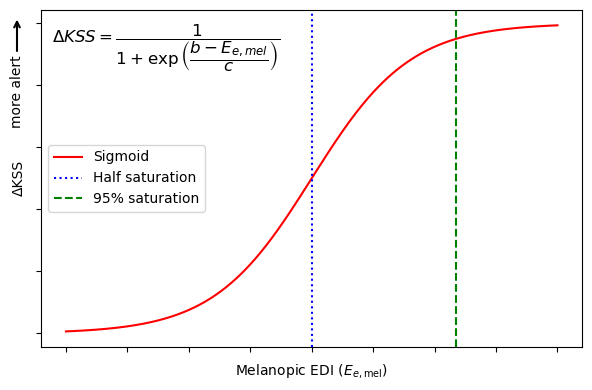

In [118]:
import numpy as np
import matplotlib.pyplot as plt

# Example sigmoid parameters
def sigmoid(x, b, c):
    return 1 / (1 + np.exp((b - x) / c))

x = np.linspace(0, 2, 500)
b, c = 1, 0.2  # example parameters
y = sigmoid(x, b, c)

plt.figure(figsize=(6, 4))
plt.plot(x, y, label='Sigmoid', color='red')

# Half saturation (y = 1/2)
plt.axvline(b, color='blue', linestyle=':', label='Half saturation')
# 95% saturation (y = 0.95)
x_95 = b - c * np.log((1 - 0.95) / 0.95)
plt.axvline(x_95, color='green', linestyle='--', label='95% saturation')

# Remove ticks but keep axis lines
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

# Axis labels (no units)
plt.xlabel(r'Melanopic EDI ($E_{e,\mathrm{mel}}$)')
plt.ylabel('ΔKSS')

# Add sigmoid formula on the plot
plt.text(
    0.02, 0.9,
    r"$ΔKSS = \dfrac{1}{1 + \exp\left(\dfrac{b-E_{e,mel}}{c}\right)}$",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8, pad=0.2, edgecolor='none')
)

# Add "more alert" with a vertical arrow pointing up, above ΔKSS label, rotated to match ylabel
ax = plt.gca()
# First annotation: the text, rotated to match ylabel
ax.annotate(
    "more alert",
    xy=(-0.09, 0.5), xytext=(-0.045, 0.65),
    xycoords=('axes fraction', 'axes fraction'),
    textcoords=('axes fraction', 'axes fraction'),
    ha='center', va='bottom', fontsize=10, rotation=90
)
# Second annotation: the arrow only, from just above the y-axis to above the label
ax.annotate(
    "",
    xy=(-0.045, 0.98), xytext=(-0.045, 0.87),
    xycoords=('axes fraction', 'axes fraction'),
    textcoords=('axes fraction', 'axes fraction'),
    arrowprops=dict(arrowstyle='->', color='black', lw=1.5)
)

plt.legend()
plt.tight_layout()
plt.show()

In [2]:
folder = './data/'
days = 1
steps = 600

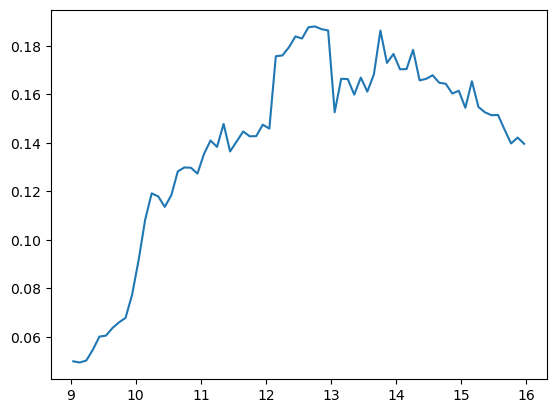

In [3]:
input_file = pd.read_csv(folder+'input_irradiance_mel.csv', sep=";", decimal=",")
# input_file
plt.plot(input_file['hours'], input_file['irradiance_mel'])

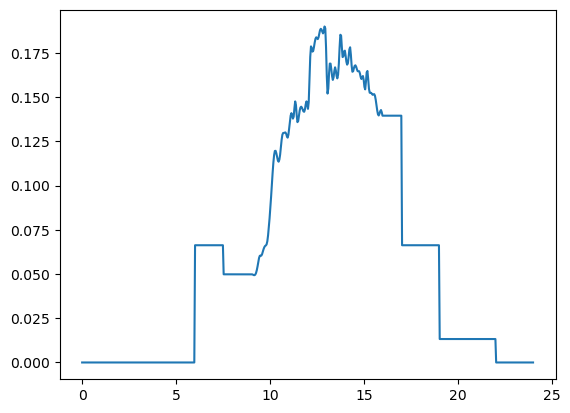

In [4]:
def irradiance(
    t,
    input_irradiance,
    waketime=6,
    bedtime=22,
    morning_cutoff=7.5,
    afternoon_cutoff=17,
    evening_cutoff=19,
    default_night_exposure=0,
    default_day_exposure=50,
    default_evening_exposure=10,
    ramp=False,
):
    """Irradiance Function
    Inputs:
        t: time in seconds
        input_irradiance: input irradiance data
        waketime: time to wake up in hours
        bedtime: time to sleep in hours
        morning_cutoff: time to start morning light exposure in hours
        afternoon_cutoff: time to start afternoon light exposure in hours
        evening_cutoff: time to start evening light exposure in hours
        default_night_exposure: default night exposure in lux
        default_day_exposure: default day exposure in lux
        default_evening_exposure: default evening exposure in lux
    Outputs:
        output_irradiance: Melanopic Irradiance
    
    The default shape of the irradiance curve is dictated by C. Pierson.
    """

    t = t % (24 * 3600)

    if t <= waketime * 3600 or t >= bedtime * 3600:
        output_irradiance = default_night_exposure / constants.CONVERSION_FACTOR
    elif t < morning_cutoff * 3600:
        if ramp:
            output_irradiance = (
                default_night_exposure
                + (
                    (t - waketime * 3600)
                    / 3600
                    / (morning_cutoff - waketime)
                    * default_day_exposure
                )
            ) / constants.CONVERSION_FACTOR
        else:
            output_irradiance = default_day_exposure / constants.CONVERSION_FACTOR
    elif t > afternoon_cutoff * 3600 and t < evening_cutoff * 3600:
        if ramp:
            output_irradiance = (
                default_day_exposure
                - (
                    (t - afternoon_cutoff * 3600)
                    / 3600
                    / (evening_cutoff - afternoon_cutoff)
                    * (default_day_exposure - default_evening_exposure)
                )
            ) / constants.CONVERSION_FACTOR
        else:
            output_irradiance = default_day_exposure / constants.CONVERSION_FACTOR
    elif t > evening_cutoff * 3600 and t < bedtime * 3600:
        output_irradiance = default_evening_exposure / constants.CONVERSION_FACTOR
    else:
        csv_hours = input_irradiance["hours"].values
        csv_irradiance_mel = input_irradiance["irradiance_mel"].values

        interpolator = interp1d(
            csv_hours,
            csv_irradiance_mel,
            kind="cubic",
            bounds_error=False,
            fill_value=(csv_irradiance_mel[0], csv_irradiance_mel[-1]),
        )
        output_irradiance = interpolator(t / 3600)

    return output_irradiance

t = np.linspace(0, days*24*60*60, steps)
input_irradiance = [irradiance(time, input_file) for time in t]

irradiance_df = pd.DataFrame({
    "hours": t/3600,
    "irradiance_mel": input_irradiance
})
# irradiance_df.head()
plt.plot(irradiance_df['hours'], irradiance_df['irradiance_mel'])

In [5]:
# # Viola 2008
# viola_blue_enriched = irradiance_df.copy()
# viola_blue_enriched.loc[
#     (viola_blue_enriched['hours'] >= 8.5) & (viola_blue_enriched['hours'] <= 16.75),
#     'irradiance_mel'
# ] = 0.4

# viola_white = irradiance_df.copy()
# viola_white.loc[
#     (viola_white['hours'] >= 8.5) & (viola_white['hours'] <= 16.75),
#     'irradiance_mel'
# ] = 0.27

# plt.figure(figsize=(8, 4))
# plt.plot(viola_blue_enriched['hours'], viola_blue_enriched['irradiance_mel'], label='Viola Blue Enriched', color='blue')
# plt.plot(viola_white['hours'], viola_white['irradiance_mel'], label='Viola White', color='gray')
# plt.xlabel('Hours')
# plt.ylabel('Melanopic Irradiance')
# plt.title('Viola 2008 Light Conditions')
# plt.legend()
# plt.grid(True)
# plt.show()

In [6]:
# # Revell 2006
# revell_420 = irradiance_df.copy()
# revell_420.loc[
#     (revell_420['hours'] >= 7.1667) & (revell_420['hours'] <= 11.667),
#     'irradiance_mel'
# ] = 0.01

# revell_440_2_3 = irradiance_df.copy()
# revell_440_2_3.loc[
#     (revell_440_2_3['hours'] >= 7.1667) & (revell_440_2_3['hours'] <= 11.667),
#     'irradiance_mel'
# ] = 0.04

# revell_440_6_2 = irradiance_df.copy()
# revell_440_6_2.loc[
#     (revell_440_6_2['hours'] >= 7.1667) & (revell_440_6_2['hours'] <= 11.667),
#     'irradiance_mel'
# ] = 0.11

# revell_470 = irradiance_df.copy()
# revell_470.loc[
#     (revell_470['hours'] >= 7.1667) & (revell_470['hours'] <= 11.667),
#     'irradiance_mel'
# ] = 0.23

# revell_600 = irradiance_df.copy()
# revell_600.loc[
#     (revell_600['hours'] >= 7.1667) & (revell_600['hours'] <= 11.667),
#     'irradiance_mel'
# ] = 0

In [ ]:
# Münch 2016
# munch_ctrl = irradiance_df.copy()
# munch_ctrl.loc[
#     (munch_ctrl['hours'] <= 8),
#     'irradiance_mel'
# ] = 0.00
# munch_ctrl.loc[
#     (munch_ctrl['hours'] >= 8) & (munch_ctrl['hours'] <= 11),
#     'irradiance_mel'
# ] = 0.0236

# munch_mbl = irradiance_df.copy()
# munch_mbl.loc[
#     (munch_mbl['hours'] <= 8),
#     'irradiance_mel'
# ] = 0.00
# munch_mbl.loc[
#     (munch_mbl['hours'] >= 8) & (munch_mbl['hours'] <= 11),
#     'irradiance_mel'
# ] = 0.6014

In [10]:
import numpy as np

# Define your target KSS deltas for CTRL and MBL (replace with your actual targets)
target_delta_ctrl = -0.9
target_delta_mbl = -1.5

# Define search ranges for S_B and S_C
S_B_values = np.linspace(0.01, 1.0, 5) # default 0.05
S_C_values = np.linspace(1/300, 1/100, 5) # default 1.0 / 223.5
NU_LA_values = np.linspace(-0.5, 0.0, 5) # default -0.11
TAU_L_values = np.linspace(15, 25, 5)* 60.0 # default 24

best_error = np.inf
best_params = None

for S_B in S_B_values:
    for S_C in S_C_values:
        for NU_LA in NU_LA_values:
            for TAU_L in TAU_L_values:
                # CTRL
                input_irr_ctrl = munch_ctrl['irradiance_mel'].values
                sol_ctrl, t_ctrl = models.model_run(
                    days, steps,
                    input_irradiance=input_irr_ctrl,
                    time_points=munch_ctrl['hours'].values*3600,
                    S_B=S_B, S_C=S_C, NU_LA=NU_LA, TAU_L=TAU_L, debug=False
                )
                t_hours_ctrl = t_ctrl / 3600
                AM_ctrl = models.alertness_measure_v(
                    models.circadian_drive_v(sol_ctrl[:,3], sol_ctrl[:,4]),
                    sol_ctrl[:,2], sol_ctrl[:,6]
                )
                idx_8_ctrl = np.argmin(np.abs(t_hours_ctrl - 8))
                idx_11_ctrl = np.argmin(np.abs(t_hours_ctrl - 11))
                delta_ctrl = AM_ctrl[idx_11_ctrl] - AM_ctrl[idx_8_ctrl]

                # MBL
                input_irr_mbl = munch_mbl['irradiance_mel'].values
                sol_mbl, t_mbl = models.model_run(
                    days, steps,
                    input_irradiance=input_irr_mbl,
                    time_points=munch_mbl['hours'].values*3600,
                    S_B=S_B, S_C=S_C, NU_LA=NU_LA, TAU_L=TAU_L, debug=False
                )
                t_hours_mbl = t_mbl / 3600
                AM_mbl = models.alertness_measure_v(
                    models.circadian_drive_v(sol_mbl[:,3], sol_mbl[:,4]),
                    sol_mbl[:,2], sol_mbl[:,6]
                )
                idx_8_mbl = np.argmin(np.abs(t_hours_mbl - 8))
                idx_11_mbl = np.argmin(np.abs(t_hours_mbl - 11))
                delta_mbl = AM_mbl[idx_11_mbl] - AM_mbl[idx_8_mbl]

                # Calculate error (sum of squared errors for both conditions)
                error = (delta_ctrl - target_delta_ctrl)**2 + (delta_mbl - target_delta_mbl)**2

                if error < best_error:
                    best_error = error
                    best_params = (S_B, S_C, NU_LA, TAU_L)
                    print(f"New best: S_B={S_B}, S_C={S_C}, NU_LA={NU_LA}, TAU_L={TAU_L}, error={error}, delta_ctrl={delta_ctrl}, delta_mbl={delta_mbl}")

print(f"Best parameters: S_B={best_params[0]}, S_C={best_params[1]}, NU_LA={best_params[2]},TAU_L={best_params[3]} error={best_error}")

New best: S_B=0.01, S_C=0.0033333333333333335, NU_LA=-0.5, TAU_L=900.0, error=22.840984870549114, delta_ctrl=-4.752195380478396, delta_mbl=-4.328705644136559
New best: S_B=0.01, S_C=0.0033333333333333335, NU_LA=-0.375, TAU_L=900.0, error=8.939477960444373, delta_ctrl=-3.416197398942787, delta_mbl=-3.1150011176460297
New best: S_B=0.01, S_C=0.0033333333333333335, NU_LA=-0.25, TAU_L=900.0, error=1.55390403480005, delta_ctrl=-2.080196973548202, delta_mbl=-1.901296820854233
New best: S_B=0.01, S_C=0.0033333333333333335, NU_LA=-0.125, TAU_L=900.0, error=0.6842830687161046, delta_ctrl=-0.744196405099399, delta_mbl=-0.6875910460044437
New best: S_B=0.01, S_C=0.0033333333333333335, NU_LA=-0.125, TAU_L=1050.0, error=0.6205591177419416, delta_ctrl=-0.7640775581930277, delta_mbl=-0.7240591468706059
New best: S_B=0.01, S_C=0.0033333333333333335, NU_LA=-0.125, TAU_L=1200.0, error=0.5732849377990688, delta_ctrl=-0.7792245095456058, delta_mbl=-0.7525388179279346
New best: S_B=0.01, S_C=0.003333333333

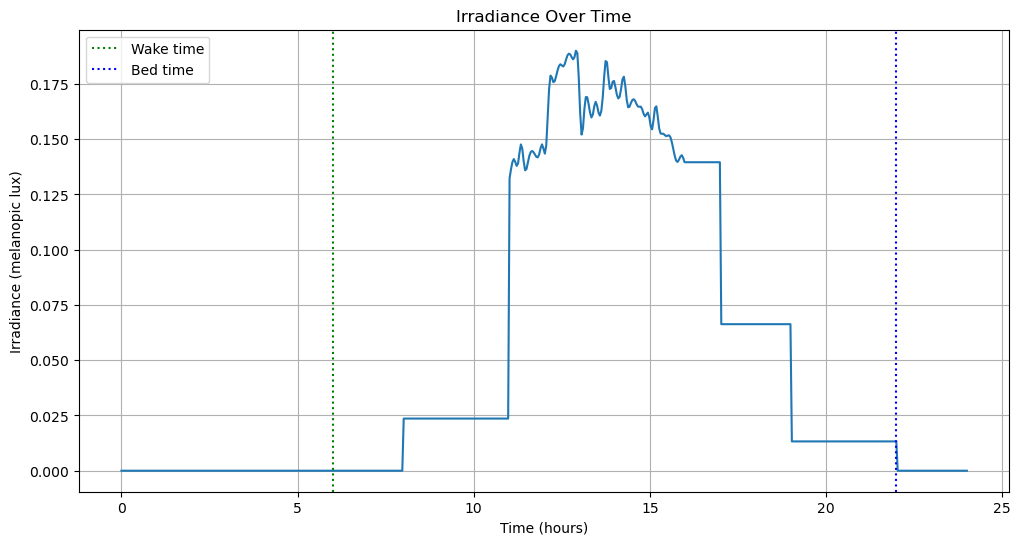

In [16]:
# input_irr = viola_blue_enriched['irradiance_mel'].values
# input_irr = viola_white['irradiance_mel'].values
# input_irr = revell_440_2_3['irradiance_mel'].values
# input_irr = revell_440_6_2['irradiance_mel'].values
# input_irr = revell_470['irradiance_mel'].values
input_irr = munch_ctrl['irradiance_mel'].values
# input_irr = munch_mbl['irradiance_mel'].values
S_B=0.01
S_C=0.01
NU_LA=-0.25
TAU_L=1050.0

(sol, t) = models.model_run(days, steps, 
                            input_irradiance = input_irr, 
                            time_points=munch_ctrl['hours'].values*3600, 
                            S_B = S_B,
                            S_C = S_C,
                            NU_LA = NU_LA,
                            TAU_L = TAU_L,
                            debug=True)
# (sol, t) = models.model_run(days, steps, input_irradiance=input_irradiance, time_points=t, debug=True)

In [17]:
# Extracting all the variables from the model
V_v = sol[:, 0]
V_m = sol[:, 1]
H = sol[:, 2]
X = sol[:, 3]
Y = sol[:, 4]
P = sol[:, 5]
Theta_L = sol[:, 6]
A = sol[:,7]
rho_b = sol[:, 8]
t_hours = t/3600
aMT6s = [models.urinary_excretion_rate(rho_b, t, time) for time in t]
C = models.circadian_drive_v(X,Y)
AM = models.alertness_measure_v(C, H, Theta_L)
Sigmoid = models.sigmoid_v(input_irr, S_B = S_B, S_C = S_C)

In [18]:
mask = (t_hours >= 8.5) & (t_hours <= 16.75)
avg_KSS = np.mean(np.array(AM)[mask])
print("Average KSS (AM) between 8.5 and 16.75 hours:", avg_KSS)

mask = (t_hours >= 7.1667) & (t_hours <= 11.667)
avg_KSS = np.mean(np.array(AM)[mask])
print("Average KSS (AM) between 7.1667 and 11.667 hours:", avg_KSS)

start_idx = np.argmin(np.abs(t_hours - 7.1667))
end_idx = np.argmin(np.abs(t_hours - 11.1667))
delta_KSS = AM[end_idx] - AM[start_idx]
print(f"KSS (AM) delta between 7.1667 and 11.1667 hours (must be negative): {delta_KSS}")

times = [8, 9, 10, 11]
idx_8am = np.argmin(np.abs(t_hours - 8))
KSS_8am = AM[idx_8am]

for hour in times:
    idx = np.argmin(np.abs(t_hours - hour))
    delta = AM[idx] - KSS_8am
    print(f"KSS (AM) delta between 8 AM and {hour} AM: {delta}")


Average KSS (AM) between 8.5 and 16.75 hours: 1.495873780006476
Average KSS (AM) between 7.1667 and 11.667 hours: 2.0107836308609373
KSS (AM) delta between 7.1667 and 11.1667 hours (must be negative): -1.1530187270141923
KSS (AM) delta between 8 AM and 8 AM: 0.0
KSS (AM) delta between 8 AM and 9 AM: -1.2509540612957053
KSS (AM) delta between 8 AM and 10 AM: -1.1185114064178128
KSS (AM) delta between 8 AM and 11 AM: -1.0157717713470142


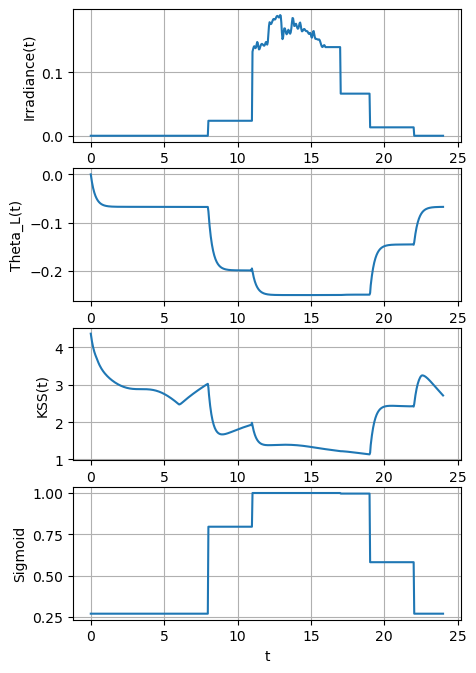

In [ ]:
### Plot AM-related variables
plt.figure(figsize=(5, 10))

plt.subplot(5,1,1)
plt.plot(munch_ctrl['hours'].values, input_irr)
plt.xlabel('t')
plt.ylabel('Irradiance(t)')
plt.grid(True)

plt.subplot(5,1,2)
plt.plot(t_hours, Theta_L)
plt.xlabel('t')
plt.ylabel('Theta_L(t)')
plt.grid(True)

plt.subplot(5,1,3)
plt.plot(t_hours, AM)
plt.xlabel('t')
plt.ylabel('KSS(t)')
plt.grid(True)

plt.subplot(5,1,4)
plt.plot(t_hours, Sigmoid)
plt.xlabel('t')
plt.ylabel('Sigmoid')
plt.grid(True)

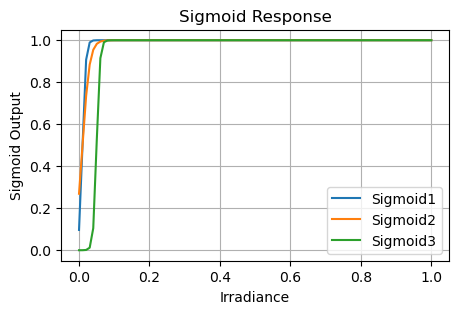

In [20]:
import numpy as np
import matplotlib.pyplot as plt

temp = np.linspace(0, 1, 100)
Sigmoid1 = models.sigmoid_v(temp, S_B=S_B)
Sigmoid2 = models.sigmoid_v(temp, S_B=S_B, S_C=S_C)
Sigmoid3 = (models.sigmoid_v(temp) - models.sigmoid_v(0)) / (models.sigmoid_v(1000) - models.sigmoid_v(0))

plt.figure(figsize=(5, 3))
plt.plot(temp, Sigmoid1, label='Sigmoid1')
plt.plot(temp, Sigmoid2, label='Sigmoid2')
plt.plot(temp, Sigmoid3, label='Sigmoid3')
plt.xlabel('Irradiance')
plt.ylabel('Sigmoid Output')
plt.title('Sigmoid Response')
plt.legend()
plt.grid(True)
plt.show()